<a href="https://colab.research.google.com/github/yarnikitin/-/blob/master/%D0%94%D0%97_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Берем признаки с урока, применяем модель**

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()
x = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

In [4]:
x.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


# **Рассчитываем MAE, MSE, R2 на тренировочной и тестовой выборке**

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, shuffle = True, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [31]:
print('MAE LEARNING {}'.format(mean_absolute_error(y_train, pred_train)))

MAE LEARNING 0.9066411609498668


In [32]:
print("MAE TESTING {}".format(mean_absolute_error(y_test, pred_test)))

MAE TESTING 2.1425984251968497


In [33]:
print('MSE LEARNING {}'.format(mean_squared_error(y_train, pred_train)))

MSE LEARNING 1.7955127097625312


In [34]:
print('MSE TESTING {}'.format(mean_squared_error(y_test, pred_test)))

MSE TESTING 10.268020330708659


In [35]:
print('R^2 LEARNING {}'.format(r2_score(y_train, pred_train)))

R^2 LEARNING 0.9797532966643531


In [36]:
print('R^2 TESTING {}'.format(r2_score(y_test, pred_test)))

R^2 TESTING 0.8533708531451716


# **Соотношение коэффицентов корреляции**


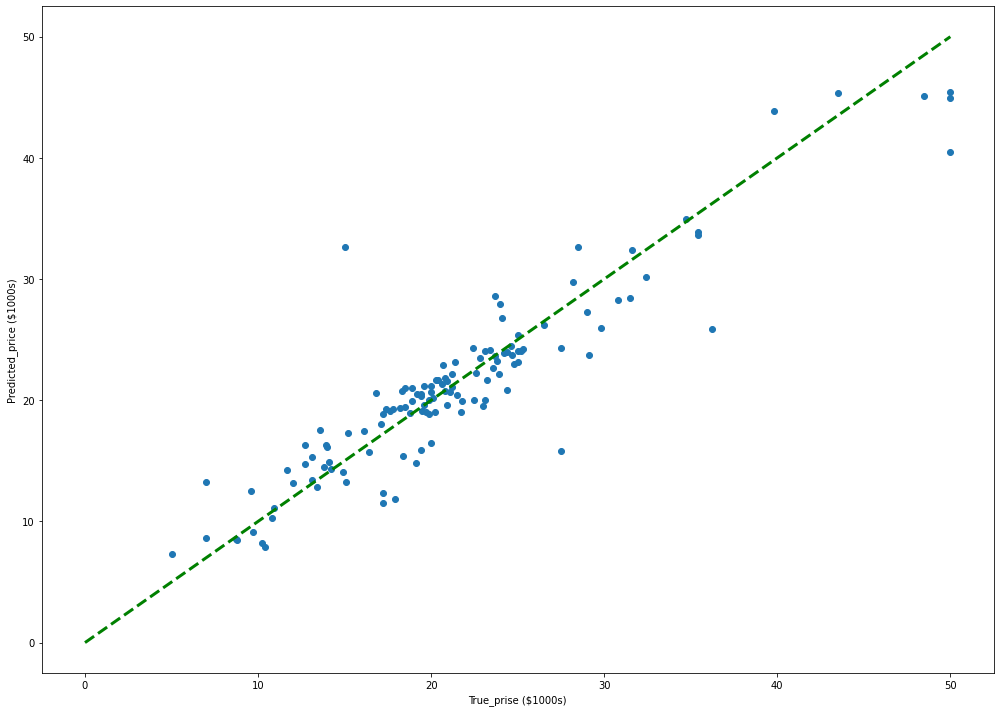

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
plt.scatter(y_test, pred_test)
plt.plot([0, 50], [0, 50], '--k', color='green', linewidth=3)
plt.xlabel('True_prise ($1000s)')
plt.ylabel('Predicted_price ($1000s)')
plt.tight_layout()

# **Вывод: R2 на тествовом наборе < R2 на обучающем наюоре, из этого понятно, что модель сильно переобучилась на обучающем наборе.**